In [48]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from math import sqrt
import warnings
import sys
import math

warnings.filterwarnings('ignore')

sys.path.append("..")

In [6]:
data1 = pd.read_csv(f'../data/csgo_taskv2.csv')
data2 = pd.read_csv(f'../data/trip_duration_taskv2.csv')

Dataset №1

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        122410 non-null  int64  
 1   time_left         122410 non-null  float64
 2   ct_score          122410 non-null  int64  
 3   t_score           122410 non-null  int64  
 4   map               122410 non-null  object 
 5   bomb_planted      122410 non-null  bool   
 6   ct_health         122410 non-null  int64  
 7   t_health          122410 non-null  int64  
 8   ct_armor          122410 non-null  int64  
 9   t_armor           122410 non-null  int64  
 10  ct_money          122410 non-null  int64  
 11  t_money           122410 non-null  int64  
 12  ct_helmets        122410 non-null  int64  
 13  t_helmets         122410 non-null  int64  
 14  ct_defuse_kits    122410 non-null  int64  
 15  ct_players_alive  122410 non-null  int64  
 16  t_players_alive   12

In [8]:
data1.isna().sum()

Unnamed: 0          0
time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [9]:
for unique in data1['bomb_planted'].unique():
    print(unique, data1['bomb_planted'].loc[data1['bomb_planted'] == unique].count())

False 108726
True 13684


In [10]:
data_major_true = data1[data1['bomb_planted'] == True]
data_major_false = data1[data1['bomb_planted'] == False]

data_major_false_undersampled = data_major_false.sample(len(data_major_true))
data1 = pd.concat([data_major_false_undersampled, data_major_true], axis = 0)

y_cs = data1['bomb_planted']
for unique in y_cs.unique():
    print(unique, y_cs.loc[y_cs == unique].count())

False 13684
True 13684


In [11]:
data1 = data1.drop(['map'], axis=1)
x_cs = data1.drop(['bomb_planted'], axis=1)
x_train_cs, x_test_cs, y_train_cs, y_test_cs = train_test_split(x_cs, y_cs, test_size=0.3)

Dataset №2

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         729322 non-null  int64  
 1   id                 729322 non-null  object 
 2   vendor_id          729322 non-null  int64  
 3   passenger_count    729322 non-null  int64  
 4   pickup_longitude   729322 non-null  float64
 5   pickup_latitude    727475 non-null  float64
 6   dropoff_longitude  729322 non-null  float64
 7   dropoff_latitude   729322 non-null  float64
 8   trip_duration      729322 non-null  int64  
 9   pickup_datetime    729322 non-null  object 
 10  dropoff_datetime   729322 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 61.2+ MB


In [13]:
data2.isna().sum()

Unnamed: 0              0
id                      0
vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude      1847
dropoff_longitude       0
dropoff_latitude        0
trip_duration           0
pickup_datetime         0
dropoff_datetime        0
dtype: int64

In [14]:
mean_r = -0.0008561123804995453
for i in range(len(data2['pickup_latitude'])):
    if math.isnan(data2['pickup_latitude'].loc[data2.index[i]]):
        data2['pickup_latitude'].loc[data2.index[i]] = data2['dropoff_latitude'].loc[data2.index[i]] + mean_r
data2.isna().sum()

Unnamed: 0           0
id                   0
vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
pickup_datetime      0
dropoff_datetime     0
dtype: int64

In [15]:
data2 = data2.drop(['id'], axis=1)
data2 = data2.drop(['pickup_datetime'], axis=1)
data2 = data2.drop(['dropoff_datetime'], axis=1)

In [16]:
y_tx = data2['trip_duration']
x_tx = data2.drop(['trip_duration'], axis=1)

In [17]:
x_train_tx, x_test_tx, y_train_tx, y_test_tx = train_test_split(x_tx, y_tx, test_size=0.3)

## DecisionTreeClassifier

In [18]:
param_grid = {
    "max_depth": range(1, 8),
    "min_samples_split": range(1, 6),
    "criterion": ['gini', 'entropy', 'log_loss']
}

gridseach = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
gridseach.fit(x_train_cs, y_train_cs)
gridseach.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 4}

In [19]:
tree_cl = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 4)
tree_cl.fit(x_train_cs, y_train_cs)
y_pred_cs = tree_cl.predict(x_test_cs)

[Text(0.5614035087719298, 0.9285714285714286, 'x[1] <= 40.15\ngini = 0.5\nsamples = 19157\nvalue = [9593, 9564]'),
 Text(0.543859649122807, 0.7857142857142857, 'x[6] <= 303.0\ngini = 0.169\nsamples = 10550\nvalue = [986, 9564]'),
 Text(0.2807017543859649, 0.6428571428571429, 'x[1] <= 34.755\ngini = 0.111\nsamples = 9342\nvalue = [549, 8793]'),
 Text(0.14035087719298245, 0.5, 'x[1] <= 14.975\ngini = 0.077\nsamples = 7637\nvalue = [306, 7331]'),
 Text(0.07017543859649122, 0.35714285714285715, 'x[1] <= 14.865\ngini = 0.141\nsamples = 2474\nvalue = [189, 2285]'),
 Text(0.03508771929824561, 0.21428571428571427, 'x[1] <= 14.705\ngini = 0.041\nsamples = 2315\nvalue = [48, 2267]'),
 Text(0.017543859649122806, 0.07142857142857142, 'gini = 0.036\nsamples = 2268\nvalue = [41, 2227]'),
 Text(0.05263157894736842, 0.07142857142857142, 'gini = 0.254\nsamples = 47\nvalue = [7, 40]'),
 Text(0.10526315789473684, 0.21428571428571427, 'x[14] <= 0.5\ngini = 0.201\nsamples = 159\nvalue = [141, 18]'),
 Text(

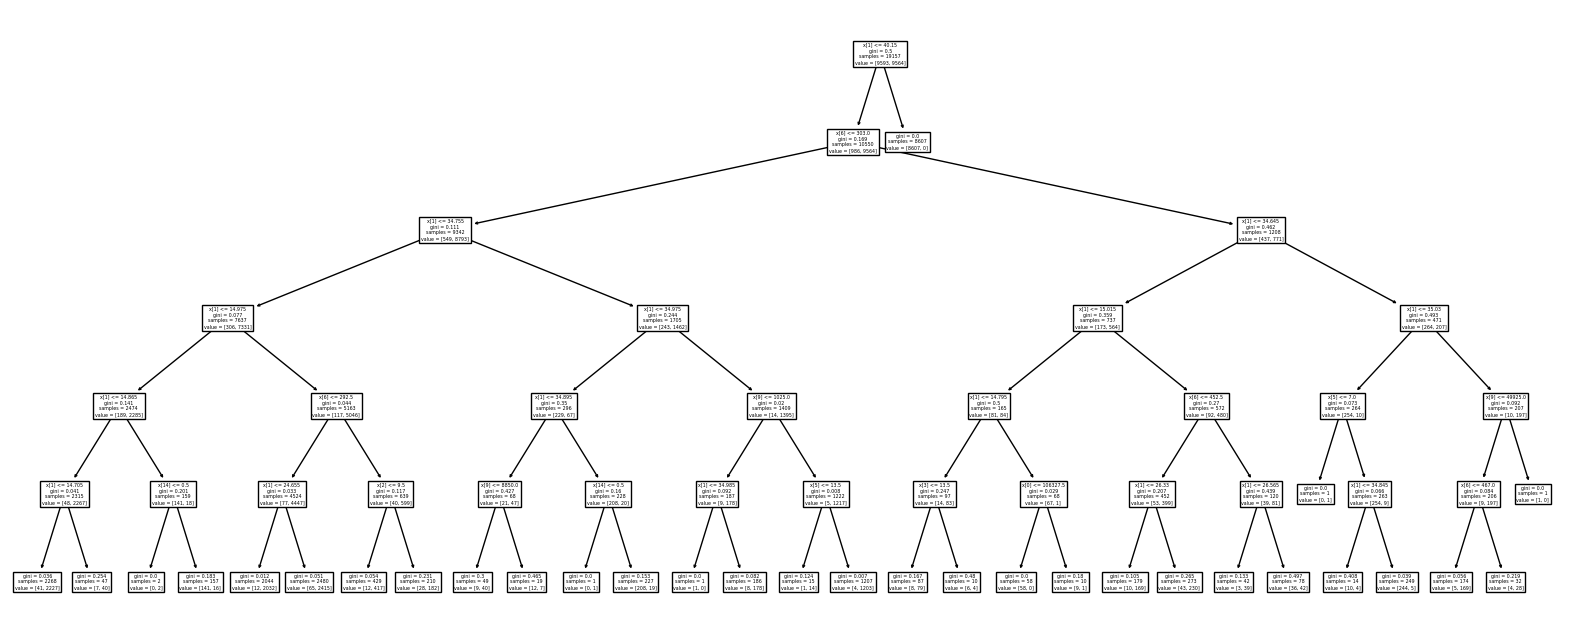

In [20]:
plt.figure(figsize=(20,8))

tree.plot_tree(tree_cl)

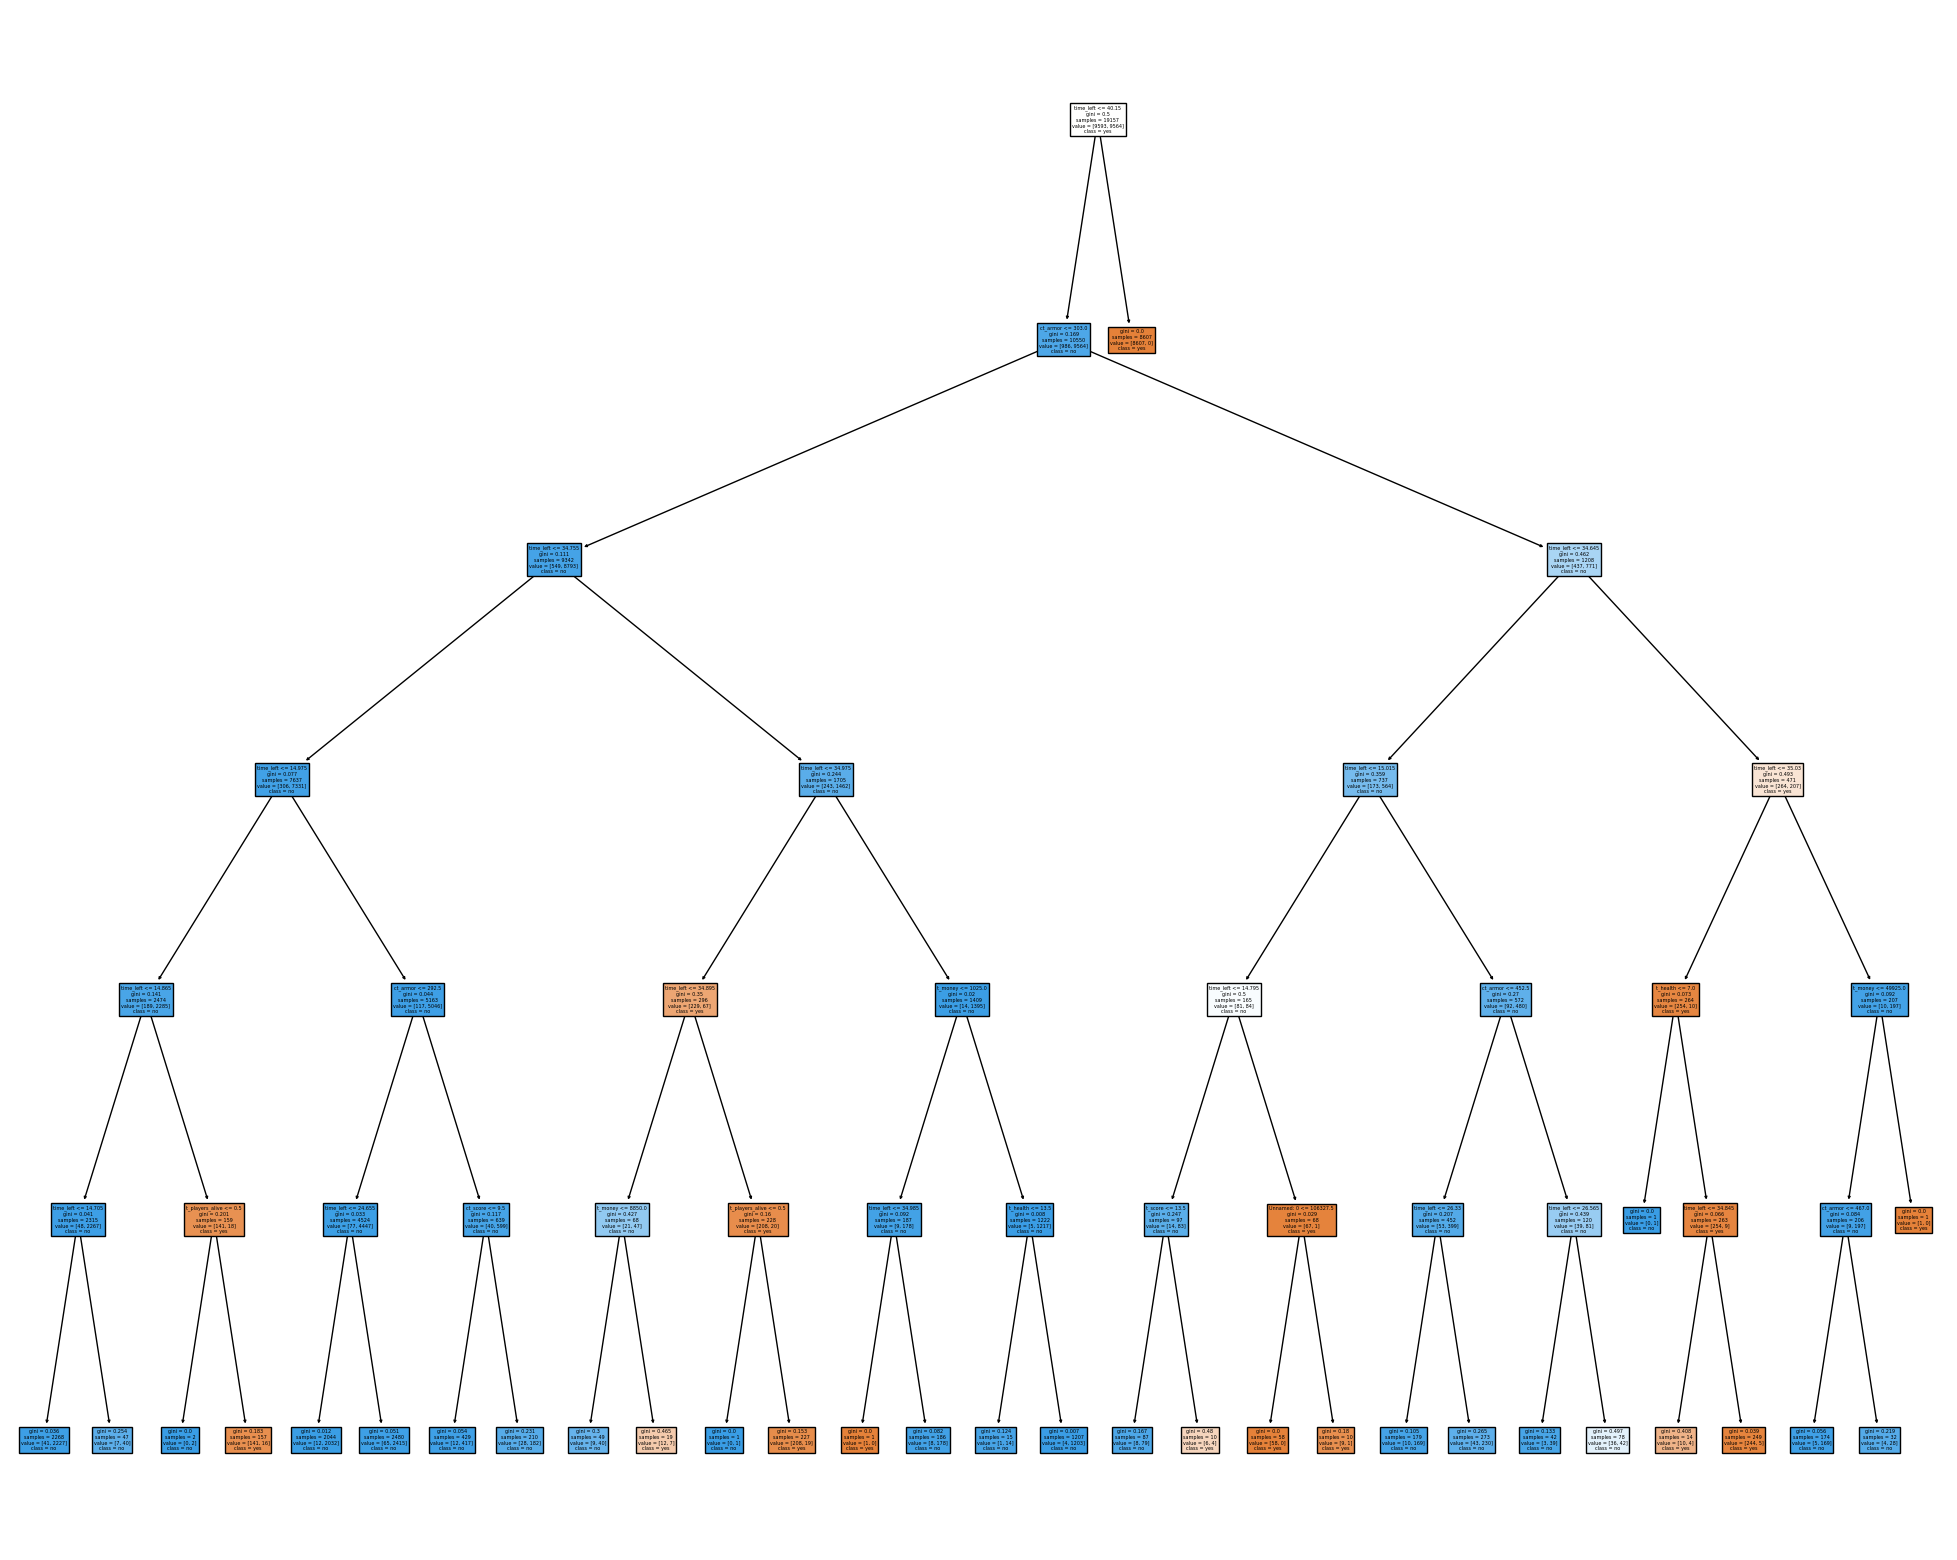

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_cl, feature_names = x_cs.columns.values.tolist (), class_names=["yes", "no"] , filled=True)

In [22]:
cm = confusion_matrix(y_test_cs, y_pred_cs)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3968  123]
 [  34 4086]]


In [23]:
print(classification_report(y_test_cs, y_pred_cs))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4091
        True       0.97      0.99      0.98      4120

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



## DecisionTreeRegression

In [24]:
'''param_grid = {
    "max_depth": range(2,8),
    "min_samples_split": range(2, 6),
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'puisson']
}

gridseach = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, scoring ='r2')
gridseach.fit(x_train_cs, y_train_cs)
gridseach.best_params_
{'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_split': 3}'''

'param_grid = {\n    "max_depth": range(2,8),\n    "min_samples_split": range(2, 6),\n    "criterion": [\'squared_error\', \'friedman_mse\', \'absolute_error\', \'puisson\']\n}\n\ngridseach = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, scoring =\'r2\')\ngridseach.fit(x_train_cs, y_train_cs)\ngridseach.best_params_\n{\'criterion\': \'friedman_mse\', \'max_depth\': 6, \'min_samples_split\': 3}'

In [25]:
tree_rg = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 6, min_samples_split = 3)
tree_rg.fit(x_train_tx, y_train_tx)
y_pred_tx = tree_rg.predict(x_test_tx)

In [26]:
print(tree.export_text(tree_rg))

|--- feature_3 <= -73.88
|   |--- feature_5 <= -73.91
|   |   |--- feature_6 <= 40.70
|   |   |   |--- feature_4 <= 40.73
|   |   |   |   |--- feature_4 <= 40.70
|   |   |   |   |   |--- feature_6 <= 40.70
|   |   |   |   |   |   |--- value: [777.41]
|   |   |   |   |   |--- feature_6 >  40.70
|   |   |   |   |   |   |--- value: [4863.00]
|   |   |   |   |--- feature_4 >  40.70
|   |   |   |   |   |--- feature_6 <= 40.68
|   |   |   |   |   |   |--- value: [1600.64]
|   |   |   |   |   |--- feature_6 >  40.68
|   |   |   |   |   |   |--- value: [1059.59]
|   |   |   |--- feature_4 >  40.73
|   |   |   |   |--- feature_4 <= 40.73
|   |   |   |   |   |--- value: [43571.00]
|   |   |   |   |--- feature_4 >  40.73
|   |   |   |   |   |--- feature_5 <= -74.01
|   |   |   |   |   |   |--- value: [2529.70]
|   |   |   |   |   |--- feature_5 >  -74.01
|   |   |   |   |   |   |--- value: [1780.11]
|   |   |--- feature_6 >  40.70
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_6 

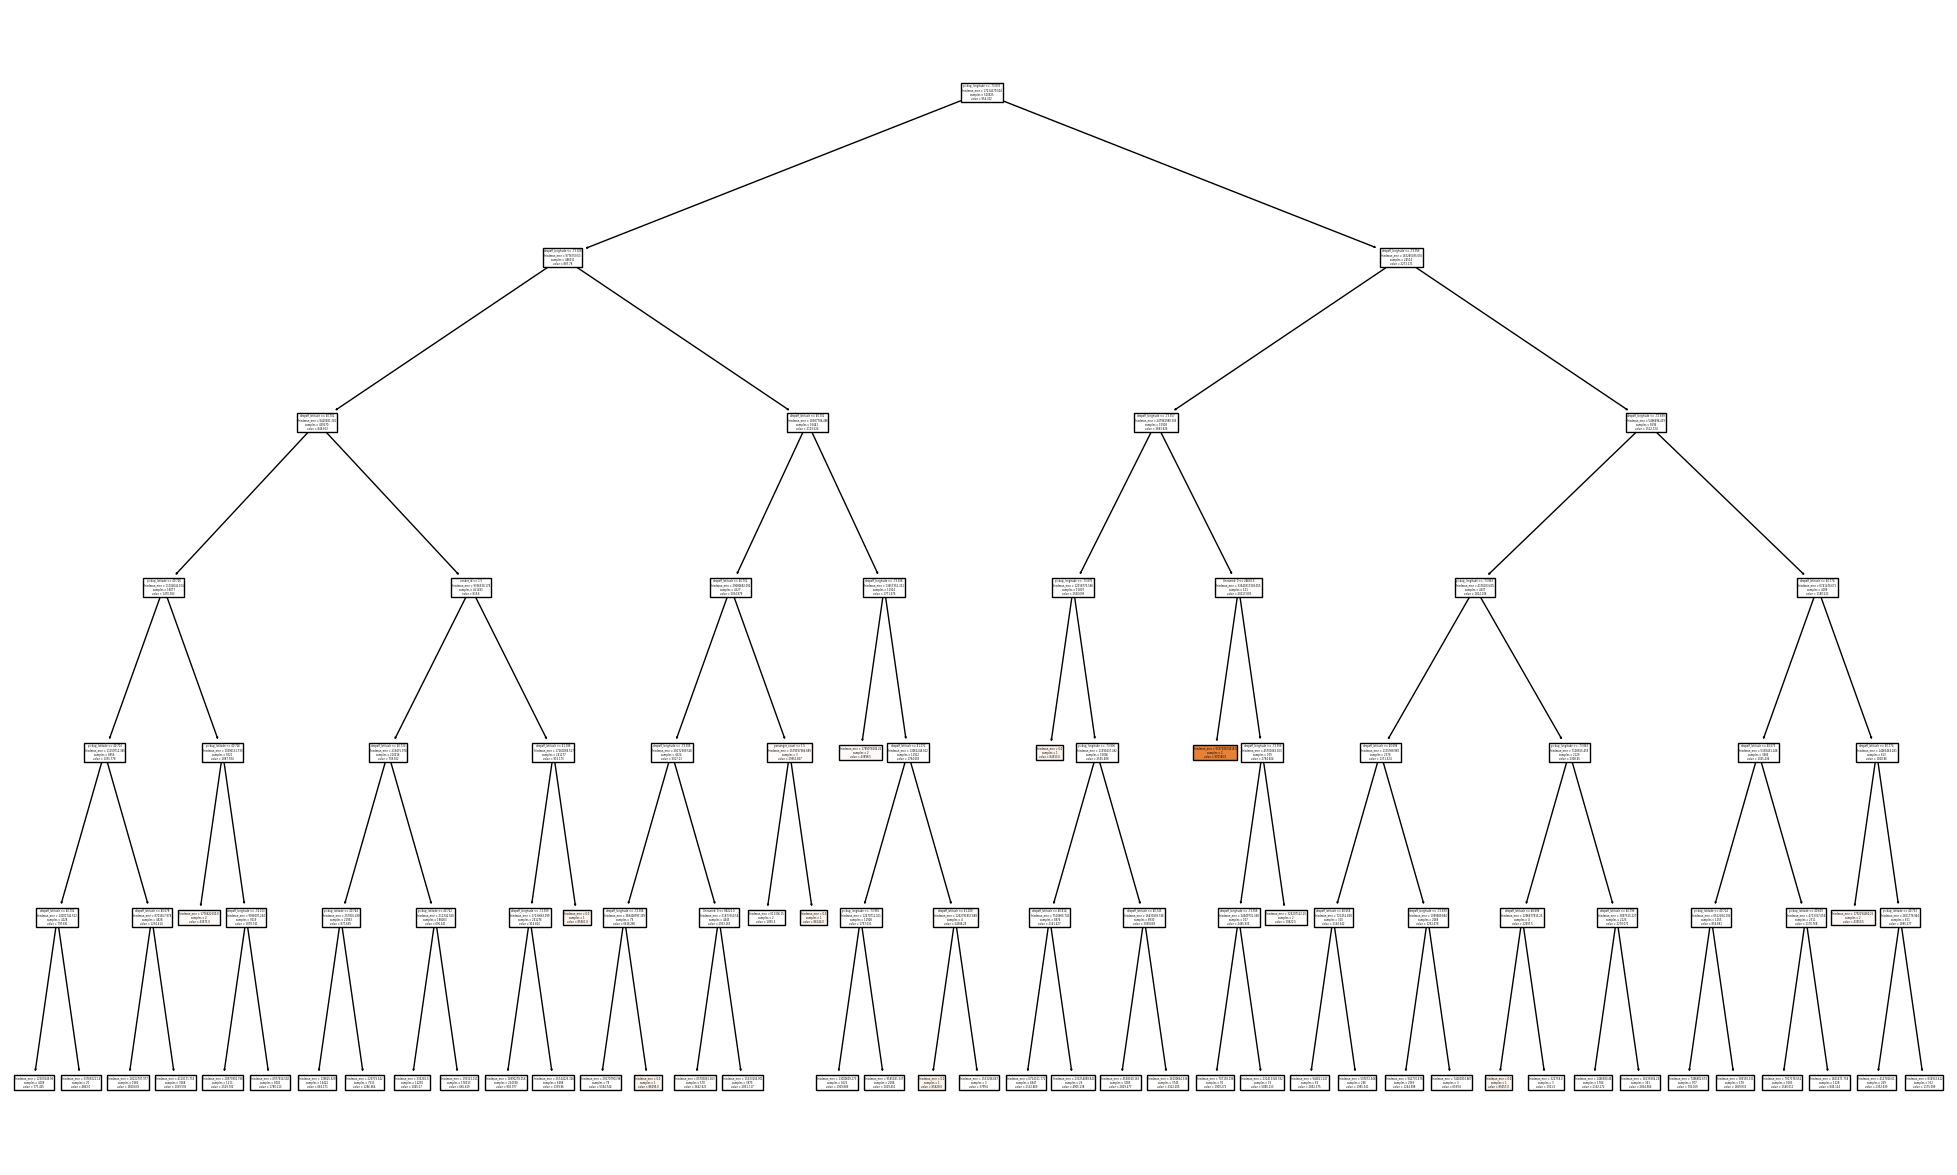

In [27]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(tree_rg, feature_names = x_tx.columns.values.tolist (), filled=True)

In [28]:
def Errors(y_test, y_predict):
    MAE = mean_absolute_error(y_test, y_predict)
    MSE = mean_squared_error(y_test, y_predict)
    RMSE = sqrt(mean_squared_error(y_test, y_predict))
    MAPE = sqrt(mean_absolute_percentage_error(y_test, y_predict))
    R2 = r2_score(y_test, y_predict)

    print('MAE: ', MAE,'MSE: ', MSE, 'RMSE: ', RMSE, 'MAPE: ', MAPE, 'R2: ', R2) 

In [29]:
Errors(y_test_tx, y_pred_tx)

MAE:  520.7722241404879 MSE:  13775779.160324363 RMSE:  3711.573677070733 MAPE:  1.1439941242614764 R2:  -0.4394233712029505


## Bagging

In [30]:
#Classifier
bagging_cl = BaggingClassifier().fit(x_train_cs, y_train_cs)
y_pred_cl = bagging_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cl))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      4091
        True       0.98      0.99      0.98      4120

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [31]:
#Regressor
bagging_rg = BaggingRegressor().fit(x_train_tx, y_train_tx)
y_pred_rg_b = bagging_rg.predict(x_test_tx)

Errors(y_test_tx, y_pred_rg_b)

MAE:  491.3028642988707 MSE:  11260431.150447857 RMSE:  3355.6565900651776 MAPE:  0.9067965230856895 R2:  -0.17659608063829668


## GradientBoosting

In [32]:
gradient_cl = GradientBoostingClassifier().fit(x_train_cs, y_train_cs)
y_pred_cl_gb = gradient_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cl_gb))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4091
        True       0.97      0.99      0.98      4120

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [33]:
gradient_rg = GradientBoostingRegressor().fit(x_train_tx, y_train_tx)
y_pred_rg_gb = gradient_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_rg_gb)

MAE:  468.91782713806884 MSE:  9461316.619882762 RMSE:  3075.925327423077 MAPE:  1.0651231082960408 R2:  0.011392378862040142


## Stacking

In [34]:
stacking_cl = StackingClassifier(estimators=[('en', DecisionTreeClassifier(criterion='entropy')),
                                        ('gini', DecisionTreeClassifier(criterion='gini'))],
                                        final_estimator=KNeighborsClassifier(10)).fit(x_train_cs, y_train_cs)

y_pred_cs_sk = stacking_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cs_sk))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4091
        True       0.97      0.99      0.98      4120

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [35]:
stacking_rg = StackingRegressor(estimators=[('en', DecisionTreeRegressor(max_depth=3)),
                                          ('lin_reg', LinearRegression())],
                               final_estimator=LinearRegression()).fit(x_train_tx, y_train_tx)

y_pred_tx_sk = stacking_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_tx_sk)

MAE:  536.3580737687337 MSE:  9530279.64821653 RMSE:  3087.115101225824 MAPE:  1.2079561182720229 R2:  0.004186471045337092


## CatBoost

In [36]:
catboost_rg = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE').fit(x_train_tx, y_train_tx)

0:	learn: 4133.8398271	total: 186ms	remaining: 186ms
1:	learn: 4129.5742095	total: 231ms	remaining: 0us


In [37]:
y_pred_cat_rg = catboost_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_cat_rg)

MAE:  524.947354767573 MSE:  9406870.620117813 RMSE:  3067.0622132780113 MAPE:  1.159374644662274 R2:  0.017081410576187728


In [38]:
catboost_cl = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True).fit(x_train_cs, y_train_cs)

0:	learn: 0.2353767	total: 3.23ms	remaining: 3.23ms
1:	learn: 0.1718967	total: 5.38ms	remaining: 0us


In [39]:
y_pred_cat = catboost_cl.predict(x_test_cs)
y_pred_cat = y_pred_cat.astype(bool)
print(classification_report(y_test_cs, y_pred_cat))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      4091
        True       0.50      1.00      0.67      4120

    accuracy                           0.50      8211
   macro avg       0.25      0.50      0.33      8211
weighted avg       0.25      0.50      0.34      8211



## XGBC

In [40]:
xgbc_cl = XGBClassifier().fit(x_train_cs, y_train_cs)
y_pred_xgbc_cl = xgbc_cl.predict(x_test_cs)
print(classification_report(y_test_cs, y_pred_xgbc_cl))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      4091
        True       0.98      0.99      0.98      4120

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [41]:
xgbc_rg = XGBRegressor().fit(x_train_tx, y_train_tx)
y_pred_xgbc_rg = xgbc_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_xgbc_rg)

MAE:  446.10603915699863 MSE:  9587808.644913157 RMSE:  3096.418680494154 MAPE:  0.9233798188595254 R2:  -0.0018247012740826296


## LGBM

In [42]:
# Regression
import re
x_train_tx = x_train_tx.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
lgbm_rg = LGBMRegressor().fit(x_train_tx, y_train_tx)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1286
[LightGBM] [Info] Number of data points in the train set: 510525, number of used features: 7
[LightGBM] [Info] Start training from score 954.302451


In [43]:
y_pred_lgbm_rg = lgbm_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_lgbm_rg)

MAE:  449.8157913290334 MSE:  9665937.366807703 RMSE:  3109.0090650893417 MAPE:  0.9937790809525775 R2:  -0.009988327225718185


In [44]:
# Class
x_train_cs = x_train_cs.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
lgbm_cl = LGBMClassifier().fit(x_train_cs, y_train_cs)

[LightGBM] [Info] Number of positive: 9564, number of negative: 9593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 19157, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499243 -> initscore=-0.003028
[LightGBM] [Info] Start training from score -0.003028


In [45]:
y_pred_lgbm_cl = lgbm_cl.predict(x_test_cs)
print(classification_report(y_test_cs, y_pred_lgbm_cl))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4091
        True       0.97      0.99      0.98      4120

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [46]:
class MyCart:
    def __init__(self, criterion, max_depth, min_samples_split):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, x, y):
        self.DecisionTree = self.build_DT(x, y, depth = 0)

    def gini(self, y):
        gini_right = len(y[1]) * (1 - np.sum((np.bincount(y[1]) / len(y[1]))**2))
        gini_left = len(y[0]) * (1 - np.sum((np.bincount(y[0]) / len(y[0]))**2))
        gini = (len(y[0]) * gini_left + len(y[1]) * gini_right) / ( len(y[0]) + len(y[1]) )
        return gini

    def mse(self, y):
        mse_right = np.mean(y[1] - np.mean(y[1]))**2
        mse_left = np.mean(y[0] - np.mean(y[0]))**2
        mse = (len(y[0]) * mse_left + len(y[1]) * mse_right) / ( len(y[0]) + len(y[1]) )
        return mse

    def optimal_split(self, x, y):
        metric = 10**10
        optimal_border = None
        for index_column in range(x.shape[1]):
            borders = np.unique(x[:, index_column])
            for border in borders:
                right = border > x[:, index_column]
                left = border <= x[:, index_column]
                if (self.criterion == 'mse'):
                    func_loss = self.mse(y[left], y[right])
                else:
                    func_loss = self.gini(y[left], y[right])
                if func_loss < metric:
                    metric = func_loss
                    optimal_border = [index_column, border]
                    
        return optimal_border

    def build_DT(self, x, y, depth):
        if (depth >= self.max_depth) or (x.shape[0] <= self.min_samples_split):
            if (self.criterion == 'mse'):
                leaf = np.mean(y)
            else:
                leaf = np.mode(y)[0]
            return {'leaf': leaf}

        optimal_border = self.optimal_split(x, y)
        right = optimal_border[1] > x[:, optimal_border[0]]
        left = optimal_border[1] <= x[:, optimal_border[0]]

        node = { 'index_column': optimal_border[0],
                 'value': optimal_border[1],
                 'right': right,
                 'left': left
               }
        
        return node

    def predict(self, x_test):
        predict = []
        for i in x_test:
            predict.append(self.searcher(x, self.node))

        return np.array(predict)

    def searcher(self, x, node):
        if node['value'] >= x[node['index_column']] :
            return self.searcher(x, node['left'])
        else:
            return self.searcher(x, node['right'])

        if 'leaf' in node:
            return node['value']


In [50]:
MyCartReg = MyCart('mse', max_depth = 6, min_samples_split = 3)

In [51]:
MyCartReg.fit(x_train_tx, y_train_tx)

InvalidIndexError: (slice(None, None, None), 0)

In [54]:
predict = MyCartReg.predict(x_test_tx)

NameError: name 'x' is not defined